# Prompt fission neutron and gamma multiplicity probability distributions

As of the latest release of the ENDF/B-VIII.0 nuclear data library, a new format was introduced to incorporate evaluated data on the prompt fission neutron and gamma multiplicity probability distributions. Previous releases of the library only included the average prompt fission neutron multiplicity, $\overline{\nu}$, as a function of the incident energy of the neutron. This data is stored in MF1 MT456 for the average prompt multiplicity, MF1 MT455 for the average delayed multiplicity, and MF1 MT452 for the average total multiplicity.

Starting with ENDF/B-VIII.0, the full multiplicity distributions, P$(\nu)$ and P$(N_\gamma$, for neutrons and gammas respectively, are stored in MF6 MT18 as a function of the incident neutron energy. Normally, an MF6 section will only contain a single subsection for each outgoing particle type. In the case of the multiplicity distributions, an MF6 MT18 section can contain more than one neutron reaction product and more than one gamma reaction product.

We can thus retrieve all neutron and gamma reaction products from an MF6 MT18 section by filtering over all reaction products given in the section. The reaction product identifier for neutrons and gammas in ENDF are respectively 1 and 0. In the following example, we filter on the reaction products using Python's list comprehension method for the ENDF/B-VIII.0 evaluation for incident neutrons on ${}^{239}$Pu.

In [1]:
import ENDFtk

tape = ENDFtk.tree.Tape.from_file('/Users/wim/Projects/libraries/endf/endf80/neutrons/n-094_Pu_239.endf')
fission = tape.material( 9437 ).file( 6 ).section( 18 ).parse()

neutrons = [ product for product in fission.reaction_products if product.product_identifier == 1. ]
photons  = [ product for product in fission.reaction_products if product.product_identifier == 0. ]

For normal reaction products found in an MF6 section, the data given for a single reaction product consists of a tabulated multiplicity of the reaction product along with optional outgoing angle and energy distribution data. Multiplicity distributions P$(\nu)$ and P(N$_\gamma$) for fission are stored in the same structure, but the data actually has to be interpreted slightly differently. This leads to what many users will see as a rather non-intuitive interface. A higher-abstraction interface for such quantities is being developed as part of a future version of ENDFtk, illustrating the adaptability of the ENDFtk.

The neutron or photon multiplicity (which will be an integer value, as the reaction product represents the emission of a number of neutrons or photons) is stored in the `LIP` or `product_modifier_flag` property. The probability distribution associated with the emission of this number of neutrons or photons is stored where the tabulated multiplicity can be found. This data can be retrieved using the `multiplicity` property.

## Application 1: plotting P($\nu$) as a function of incident energy

In this application, we will extract and plot the dependence of the neutron multiplicity probability distribution P$(\nu)$ on the incident neutron energy. For this, we will reuse the list of neutron reaction objects stored in `neutrons`.

In most cases where the ENDF material contains multiplicity probability distributions in MF6 MT18, the energy points for which these probabilities are given are the same for each reaction product. However, in the example code given below, we have assumed that this is not the case (we retrieve the energy values in MeV for each reaction product instead of doing it only once).

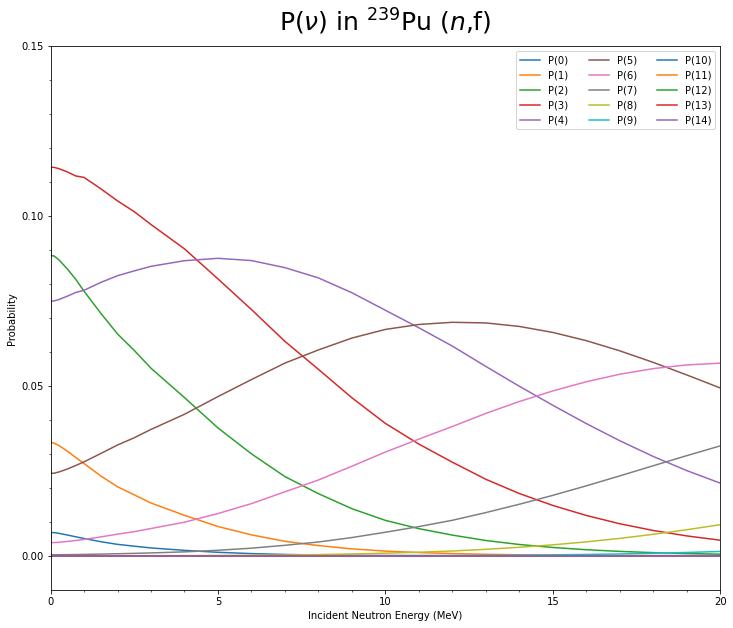

In [2]:
import matplotlib.pyplot as plot

plot.figure( figsize = (12, 10) )
for neutron in neutrons :

    plot.plot( [ energy * 1e-6 for energy in neutron.multiplicity.energies ], 
               neutron.multiplicity.multiplicities, 
               label = 'P(' + str( neutron.product_modifier_flag ) + ')' )

plot.xlabel( 'Incident Neutron Energy (MeV)' )
plot.ylabel( 'Probability' )
plot.title( r'P($\nu$) in $^{239}$Pu ($n$,f)', pad = 15, fontsize = 25 )
plot.xlim( 0, 20 )
plot.ylim( -0.01, 0.15 )
plot.xticks( [ 0, 5, 10, 15, 20 ] )
plot.yticks( [ 0, 0.05, 0.10, 0.15 ] )
plot.minorticks_on()
plot.legend( ncol = 3 )
plot.show()

# Application 2: plotting P($N_\gamma$) at various incident energy values

In this applciation, we are interested in extracting the gamma multiplicity distribution for a few incident neutron energies. For this, we will reuse the list of photon reaction objects stored in `photons`.

In order to simplify the example, we are only extracting data for incident energy values that are present in the tabulated probability data for each photon reaction product (to obtain the data at an arbitrary energy values, we would have to interpolate on the tabulated data).

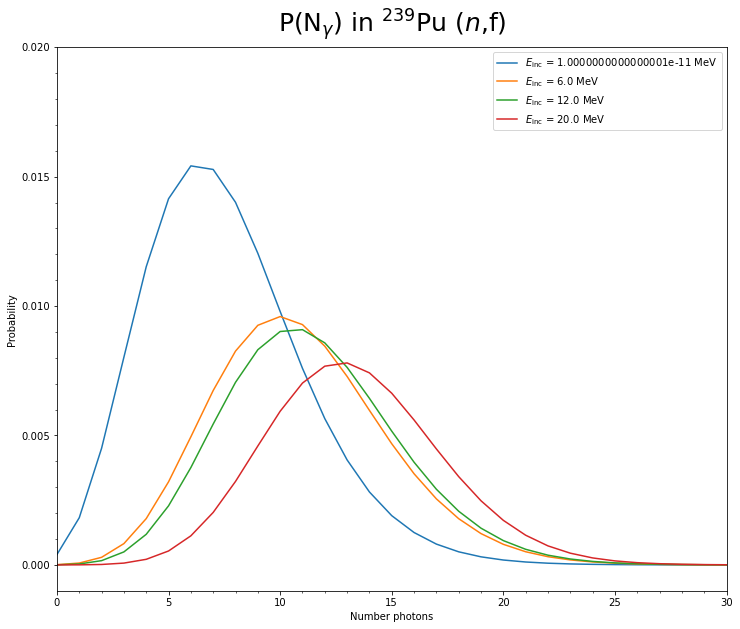

In [3]:
import matplotlib.pyplot as plot

plot.figure( figsize = (12, 10) )

# gamma multiplicity for each photon reaction product
nugamma = [ photon.product_modifier_flag for photon in photons ]

# incident energy values in MeV
energies = [ energy * 1e-6 for energy in photons[0].multiplicity.energies ] 

# loop over incident energy indices for 1e-5 eV and 6, 12 and 20 MeV
for index in [ 0, 6, 12, -1 ] :
    
    plot.plot( nugamma,
               [ photon.multiplicity.multiplicities[index] for photon in photons ], 
               label = r'$E_{\rm inc}$ = ' + str( energies[index] ) + ' MeV' )

plot.xlabel( 'Number photons' )
plot.ylabel( 'Probability' )
plot.title( r'P(N$_\gamma$) in $^{239}$Pu ($n$,f)', pad = 15, fontsize = 25 )
plot.xlim( 0, 30 )
plot.ylim( -0.001, 0.02 )
plot.xticks( [ 0, 5, 10, 15, 20, 25, 30 ] )
plot.yticks( [ 0, 0.005, 0.010, 0.015, 0.02 ] )
plot.minorticks_on()
plot.legend()
plot.show()